In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
dataset = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(dataset['Churn_Modelling.csv']))

In [6]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.drop(['RowNumber' , 'Surname' , 'CustomerId'] , axis=1 , inplace=True)

In [13]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
data.Gender = data.Gender.replace({'Female' : 0 , 'Male' : 1})

In [18]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6380,603,Germany,1,35,1,123407.69,1,1,0,152541.89,1
1036,521,France,1,30,2,107316.09,1,1,0,64299.82,0
1378,715,Spain,0,35,4,40169.88,2,1,1,199857.47,0
6109,581,Germany,0,26,3,105099.45,1,1,1,184520.00,1
532,729,France,1,32,6,93694.42,1,1,1,79919.13,0


In [19]:
data.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
data.groupby(data.Geography).count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


**So, here we are haveing three different geography and now we have to replace it with the dummy values..**

In [25]:
geography_dummies = pd.get_dummies(data['Geography'] , drop_first=True)

In [26]:
geography_dummies

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [27]:
data = pd.concat([data , geography_dummies] , axis = 1)

In [28]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [29]:
data.drop('Geography', axis = 1 , inplace = True)

In [30]:
data.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [31]:
data.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Germany              uint8
Spain                uint8
dtype: object

In [45]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

**Now we have to scale these values in order to train the model very well..**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary']
data1 = data

data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [37]:
data1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,1


In [54]:
data1.dtypes

CreditScore        float64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Germany              uint8
Spain                uint8
dtype: object

In [39]:
len(data1.columns)

12

**So, here our data is ready and now we have to train our model..**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [55]:
model = keras.Sequential([
                          keras.layers.Dense(11 , input_shape = (11,) , activation='relu'),
                          keras.layers.Dense(6 , activation='relu'),
                          keras.layers.Dense(1 , activation='sigmoid')
])

In [78]:
X = data1.drop('Exited' , axis = 1)
y = data1.Exited	

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 100)

In [79]:
X_train.shape

(8000, 11)

In [80]:
X_test.shape

(2000, 11)

In [81]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [82]:
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5223 - accuracy: 0.7817
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8075
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8145
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8274
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8316
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8310
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8398
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8412
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8461
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3632 - accura

In [83]:
model.evaluate(X_test , y_test)

63/63 [==============================] - 0s 840us/step - loss: 0.3619 - accuracy: 0.8530


[0.3619314134120941, 0.8529999852180481]

In [84]:
yp = model.predict(X_test)
y_pred = []

for values in yp:
  if(values > 0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)


from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1588
           1       0.71      0.48      0.58       412

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

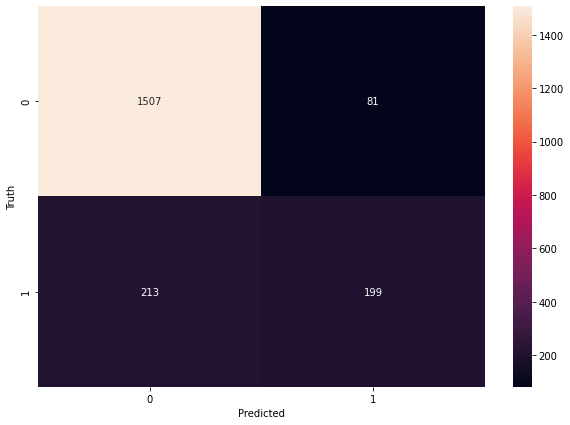

In [85]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
data1.groupby('Exited').count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
Exited,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
